In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv('/Users/vika/Desktop/water.csv', usecols = [1,2,3,4])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [7]:
data.describe()

,mortality,hardness
count,61.000000,61.000000
mean,1524.147541,47.180328
std,187.668754,38.093966
min,1096.000000,5.000000
25%,1379.000000,14.000000
50%,1555.000000,39.000000
75%,1668.000000,75.000000
max,1987.000000,138.000000


Text(0.5, 1.0, 'СМЕРТНОСТЬ')

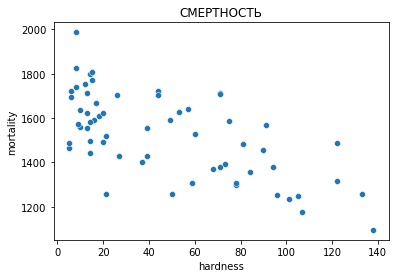

In [8]:
ax = sns.scatterplot(x='hardness', y='mortality', data = data, palette = 'Blues')
ax.set_title('смертность'.upper())

Text(0.5, 1.0, 'КОРР МАТРИЦА')

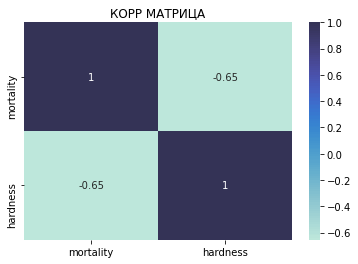

In [9]:
ax = sns.heatmap(data.corr(method='pearson'), annot = True, center = 1.5)
ax.set_title('КОРР МАТРИЦА')

Text(0.5, 1.0, 'КОРР МАТРИЦА')

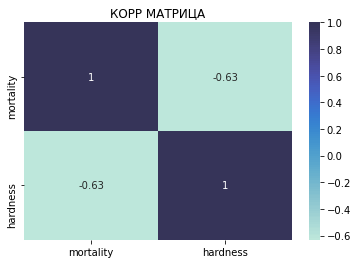

In [10]:
ax = sns.heatmap(data.corr(method='spearman'), annot = True, center = 1.5)
ax.set_title('КОРР МАТРИЦА')

In [11]:
X = data[['hardness']]
Y = data['mortality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [15]:
print(f'коэффициент детерминации: {model.score(X_test, y_test)}')

коэффициент детерминации: 0.5046490611017092


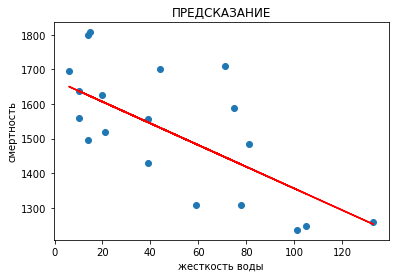

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'ПРЕДСКАЗАНИЕ',
       xlabel = 'жесткость воды',
       ylabel = 'смертность')
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='r')
plt.show()

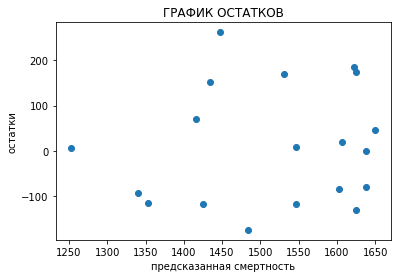

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'ГРАФИК ОСТАТКОВ',
       xlabel = 'предсказанная смертность',
       ylabel = 'остатки')
plt.scatter(y_pred, (y_test - y_pred))
plt.show()

In [ ]:
# получается чем ниже жесткость воды, тем выше смертность

In [18]:
data_N = data[data['location']=='North']
data_S = data[data['location']=='South']

коэффициент детерминации "Север": -0.1903124043025357
коэффициент детерминации "Юг": -3.0078243532565248


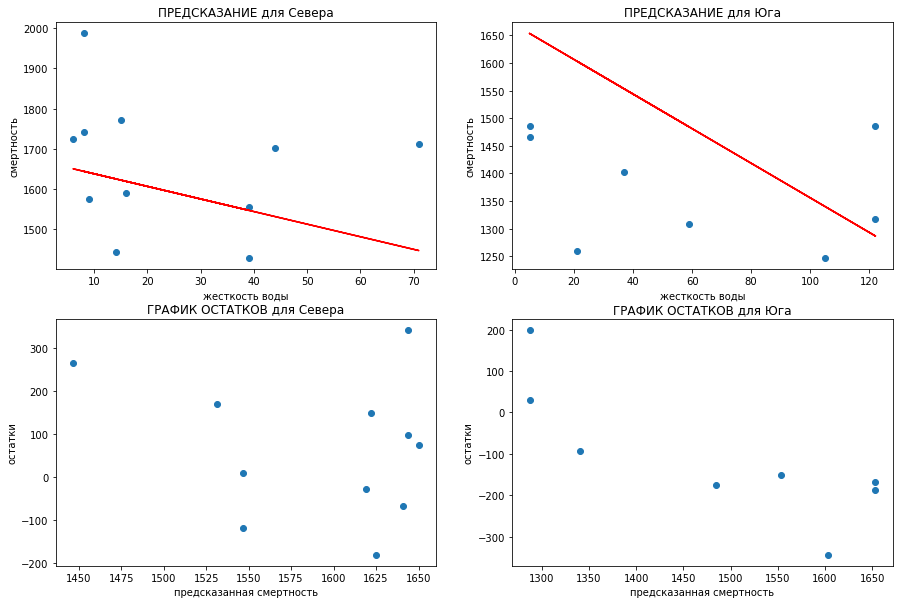

In [19]:
X_N = data_N[['hardness']]
Y_N = data_N['mortality']
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X_N, Y_N, test_size=0.30, random_state=42)
model_N = LinearRegression()
model_N.fit(X_train_N, y_train_N) 
y_pred_N = model.predict(X_test_N)
print(f'коэффициент детерминации "Север": {model.score(X_test_N, y_test_N)}')

#для юга
X_S = data_S[['hardness']]
Y_S = data_S['mortality']
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, Y_S, test_size=0.30, random_state=42)
model_S = LinearRegression()
model_S.fit(X_train_S, y_train_S) 
y_pred_S = model.predict(X_test_S)
print(f'коэффициент детерминации "Юг": {model.score(X_test_S, y_test_S)}')

#точечные графики тестовой выборки и регрессионные прямые
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
#север
ax[0][0].set(title = 'ПРЕДСКАЗАНИЕ для Севера',
        xlabel = 'жесткость воды',
        ylabel = 'смертность')
ax[0][0].scatter(X_test_N, y_test_N)
ax[0][0].plot(X_test_N, y_pred_N, color='r')
#plt.show()
#графики остатков
ax[1][0].set(title = 'ГРАФИК ОСТАТКОВ для Севера',
        xlabel = 'предсказанная смертность',
        ylabel = 'остатки')
ax[1][0].scatter(y_pred_N, (y_test_N - y_pred_N))

#юг
ax[0][1].set(title = 'ПРЕДСКАЗАНИЕ для Юга',
        xlabel = 'жесткость воды',
        ylabel = 'смертность')
ax[0][1].scatter(X_test_S, y_test_S)
ax[0][1].plot(X_test_S, y_pred_S, color='r')
#plt.show()
#графики остатков
ax[1][1].set(title = 'ГРАФИК ОСТАТКОВ для Юга',
        xlabel = 'предсказанная смертность',
        ylabel = 'остатки')
ax[1][1].scatter(y_pred_S, (y_test_S - y_pred_S))

plt.show()

In [21]:
# модели, построенные для Юга и Севера отдельно, получились не очень хорошими; коэффициент детерминации отрицательный, что говорит о том, что суммы квадратов ошибок обоих моделей больше, чем для наивной модели